<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shestakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Metric-based models<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>
<h3><center>Nearest Centroid, K-NN</center></h3>



<sup id="fn1">1. Some materials are taken from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,10)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

# Let's recall previous lecture and finish it

* We have unsupervised and supervised learning
* Supervised algorithms reconstruct relationship between features $x$ and outputs $y$ given in **known set**
* Relationship is reconstructed by optimal function $\widehat{y}=f_{\widehat{\theta}}(x)$ from function class $\{f_{\theta}(x),\,\theta\in\Theta\}$
    * Learning = Representation + Evaluation + Optimization
* Concepts of loss-functions and quality measures

## Loss function $\mathcal{L}(\widehat{y},y)$

* **regression**:
    * MAE (mean absolute error):
$$
\mathcal{L}(\widehat{y},y)=\frac{1}{N}\sum\limits_i\left|\widehat{y}_i-y_i\right|
$$
    * MSE (mean squared error):
$$
\mathcal{L}(\widehat{y},y)=\frac{1}{N}\sum\limits_i\left(\widehat{y}_i-y_i\right)^{2}
$$

<center><img src='img/metric-example.png'></center>

In [3]:
h = np.linspace(0, 1, 200) # вероятность класса +1, которую дает классификатор
L1 = -np.log(h) # полагаем, то объект относится к классу +1. Тогда это значение его ошибки logloss
L2 = -np.log(1-h) # полагаем, то объект относится к классу -1. Тогда это значение его ошибки logloss


/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/andrey.shestakov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


* **classification**:
    * log-loss
$$
\mathcal{L}(\widehat{y},y)=\mathbb{I}[y==1]\log\left(p(\hat{y} = 1)\right) + \mathbb{I}[y==-1]\log\left(p(\hat{y}=-1)\right)
$$


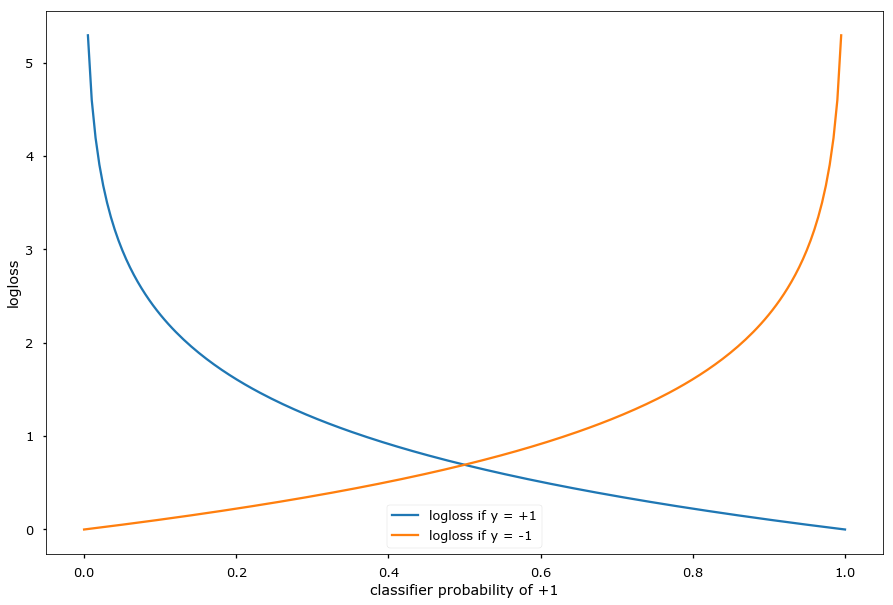

In [4]:
plt.plot(h, L1, label='logloss if y = +1')
plt.plot(h, L2, label='logloss if y = -1')
plt.ylabel('logloss')
plt.xlabel('classifier probability of +1')

_ = plt.legend()

## Optimization

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/contours_evaluation_optimizers.gif'></th>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif'></th>
  </tr>
</table>

# How to tune $f$?

## Overfitting - Underfitting

* Theoretically, a very complex model can achive perfect quality on training dataset
* Profit???
* Nope...

## Overfitting - Underfitting

<center><img src='img/overfit.png'></center>

## Empirical risk

* Want to minimize *expected risk*:
$$
\mathit{\int}\int\mathit{\mathcal{L}(f_{\theta}(\mathbf{x}),y) \cdot p(\mathbf{x},y)d\mathbf{x}dy\to\min_{\theta}}
$$

* In fact we have only $X$,$Y$ (Known set) and $X'$ (Test set)

* Can minimize *empirical risk*
$$
L(\theta|X,Y)=\frac{1}{N}\sum_{n=1}^{N}\mathcal{L}(f_{\theta}(\mathbf{x}_{n}),\,y_{n})
$$

* Method of empirical risk minimization:
$$
\widehat{\theta}=\arg\min_{\theta}L(\theta|X,Y)
$$


* How to get realistic estimate of $L(\widehat{\theta}|X',Y')$?
    * separate **validation set**
    * **cross-validation**
    * **A/B test**

# Separate validation set

* Known sample $X,Y$: $(\mathbf{x}_{1},y_{1}),...(\mathbf{x}_{M},y_{M})$
* Test sample $X',Y'$: $(\mathbf{x}_{1}',y_{1}'),...(\mathbf{x}_{K}',y_{K}')$

<center><img src='img/train_test.png'></center>

# Separate validation set
Divide known set randomly or randomly with stratification:

<center><img src='img/train_validation_test.png'></center>

## Cross-validation


### 4-fold cross-validation example

<center><img src='img/cross_validation.png'></center>

Divide training set into K parts, referred as **folds** (here $K=4$).

Variants:
* randomly
* randomly with stratification (w.r.t target value or feature value)
* randomly with respect to time domain
* etc

### 4-fold cross-validation example

<center><img src='img/cross_validation1.png'></center>
Use folds 1,2,3 for model estimation and fold 4 for model evaluation.

### 4-fold cross-validation example

<center><img src='img/cross_validation2.png'></center>


### 4-fold cross-validation example

<center><img src='img/cross_validation3.png'></center>


### 4-fold cross-validation example

<center><img src='img/cross_validation4.png'></center>

### 4-fold cross-validation example

* Denote 
    * $k(n)$ - fold to which observation $(\mathbf{x}_{n},y_{n})$ belongs $n\in I_{k}$.
    * $\widehat{\theta}^{-k}$ - parameter estimation using observations from all folds except fold $k$.

**Cross-validation empirical risk estimation**

$$\widehat{L}_{total}=\frac{1}{N}\sum_{n=1}^{N}\mathcal{L}(f_{\widehat{\theta}^{-k(n)}}(x_{n}),\,y_{n})$$


* For $K$-fold CV we have: 
    * $K$ parameters $\widehat{\theta}^{-1},...\widehat{\theta}^{-K}$
    * $K$ models $f_{\widehat{\theta}^{-1}}(\mathbf{x}),...f_{\widehat{\theta}^{-K}}(\mathbf{x}).$
    * $K$ estimations of empirical risk: $\widehat{L}_{k}=\frac{1}{\left|I_{k}\right|}\sum_{n\in I_{k}}\mathcal{L}(f_{\widehat{\theta}^{-k}}(\mathbf{x}_{n}),\,y_{n}),\,k=1,2,...K.$

        * can estimate variance & use statistics!

## Comments on cross-validation

* When number of folds $K$ is equal to number of objects $N$, this is called **leave-one-out method**.
* Cross-validation uses the i.i.d.(independent and identically distributed) property of observations
* Stratification by target $y$ helps for imbalanced/rare classes.


# A/B testing

## A/B testing

* Observe test set **after the models were built**.
* A/B testing procedure:
    1. divide test objects randomly into two groups - A and B.
    2. apply base model to A
    3. apply modified model to B
    4. compare final results
    

# Metric-based models

# Cluster hypothesis (Compactness hypothesis)

* the more $x$'s features are similar to ones of $x_i$'s, the more likely $\hat{y}=y_i$

## Cluster hypothesis examples
<center><img src='http://ichef-1.bbci.co.uk/news/624/cpsprodpb/13ED9/production/_87552618_fourupcomp.jpg' width=500></center>

* Objects: Families, households
* Featuers: address, zip code, nearest marketplace... $\rightarrow$ geo-coordinates `(lat, lon)`
* Target feature: race (classification)

## Cluster hypothesis examples
<center><img src='img/california_house.png' width=500></center>

* Objects: Houses
* Features: address... $\rightarrow$ geo-coordinates `(lat, lon)`
* Target feature: house price (regression)

<center><img src='img/dna_seq.png' width=900></center>

* Objects: DNA strings
* Features: ??
* Target features: Gene function (classification)

<hr>
<center><img src='img/text_classify.png' width=600></center>

* Objects: Documents, texts, articles
* Features: Word counts
* Target: Document category (classification)

# Similarity (distance) measures

## Similarity measures

* How do we find similar objects?
* Utilize some similiarity measure (could be metric)

### Most popular are

$$ \rho(x_i, x_j) = \sqrt{\sum\limits_{d=1}^{D}(x^d_i - x^d_j)^2} \text{: euclidean distance} $$

$$ \rho(x_i, x_j) = \sum\limits_{d=1}^{D}|x^d_i - x^d_j| \text{: manhattan distance} $$

$$ \rho(x_i, x_j) = 1 - \frac{\langle x_i,x_j \rangle}{||x_i||_2\cdot||x_j||_2} \text{: cosine distance} $$



## Illustration

<center><img src='./img/dist-example.png'></center>

### String Similarity
* Edit distance
    * Number of insertions, replacements and deletions required to modify string $S_1$ to string $S_2$
    

* Denote $D( i , j )$ as edit distance between substrings $S_1[:i]$ and $S_2[:j]$.
* Use dynamic programming approach to compute $\rho(S_1, S_2):$

\begin{equation}
 D ( i , j ) = 
 \begin{cases} 
 {\begin{array}{llcl}0,&&&i=0,\ j=0\\i,&&&j=0,\ i>0\\j,&&&i=0,\ j>0\\\min\{\\&D(i,j-1)+1,\\&D(i-1,j)+1,&&j>0,\ i>0\\&D(i-1,j-1)+{\rm {m}}(S_{1}[i],S_{2}[j])\\\}\end{array}},
 \end{cases} 
\end{equation}
where $m(a,b) = 0$, if $a = b$ and $1$ otherwise
* [Jaro–Winkler](https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance) distance
* ...

## Edit distance example

<center><img src='img/levinstein_dist.png' width=400></center>

### Similarity between sets
* Suppose thet objects are represented with sets
    * Client $a$: {french fries, big-mac, coffe, muffin}
    * Client $b$: {french fries, cheese sause, cheeseburger, coffe, cherry pie}
* Jaccard distance:
    $$\rho(a,b) = 1 - \frac{|a \cap b|}{|a \cup b|}$$

# Nearest Centroid

## Nearest centroids algorithm
* Consider training sample $\left(x_{1},y_{1}\right),...\left(x_{N},y_{N}\right)$
with 
    * $N_{1}$ representatives of 1st class
    * $N_{2}$ representatives of 2nd class
    * etc.

* **Training:**
Calculate centroids for each class $c=1,2,...C:$ 
$$
\mu_{c}=\frac{1}{N_{1}}\sum_{n=1}^{N}x_{n}\mathbb{I}[y_{n}=c]
$$

* **Classification:**
    * For object $x$ find the most closest centroid:
    $$
    c=\arg\min_{i}\rho(x,\mu_{i})
    $$
    * Associate $x$ the class of the most close centroid:
    $$
    \widehat{y}(x)=c
    $$

In [5]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid

In [6]:
def plot_centroid_class():
    
    X_blobs, y_blobs = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.4, random_state=123)
    
    X_centers = np.zeros((4, 2))
    for i in range(4):
        X_centers[i,:] = X_blobs[y_blobs==i,:].mean(axis=0)
    
    plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    knn = NearestCentroid()
    knn.fit(X_blobs, y_blobs)
    
    x_range = np.linspace(X_blobs.min(), X_blobs.max(), 500)
    # ОДЗ значений признаков

    xx1, xx2 = np.meshgrid(x_range, x_range)
    
    Y = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X_blobs[:,0], X_blobs[:,1],c=y_blobs, cmap=plt.cm.Spectral_r)
    plt.scatter(X_centers[:, 0], X_centers[:, 1], marker='*', s=400)
    plt.axis('equal')
    plt.show()

## Decision boundaries for 4-class nearest centroids}

In [7]:
interact(plot_centroid_class) 

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.plot_centroid_class()>

## Questions
* To make a decision in classification we calculate **discriminant functions**
    * measure *score* for each class:
        $$ c=\arg\min_{i}g_c \text{ or } c=\arg\max_{i}g_c$$
* What are discriminant functions $g_{c}(x)$ for nearest centroid algorithm?
* What is the complexity for:
    * training? 
    * prediction?
    
    
* What would be the shape of class separating boundary?
* Can we use similar ideas for regression?
* Is it always possible to have centroids?

# K-nearest neighbours (KNN)

## K-nearest neighbours algorithm

**Classification:**
* Find $k$ closest objects to the predicted object $x$ in the training~set.
* Associate $x$ the most frequent class among its $k$ neighbours.
<center><img src="img/K-NN classification.png"></center>


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(noise=0.3, random_state=1234)

Text(0, 0.5, '$x_2$')

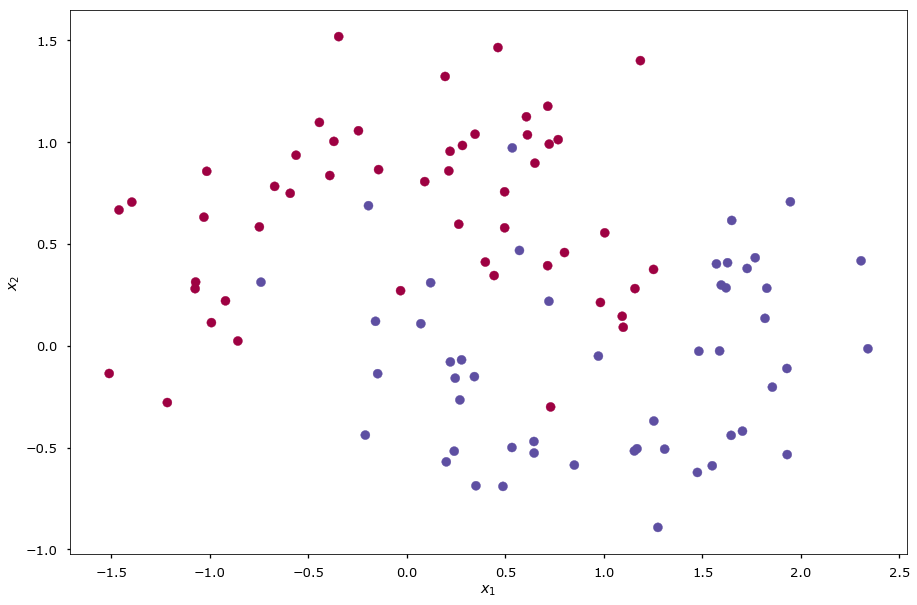

In [10]:
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap=plt.cm.Spectral)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [11]:
def plot_knn_class(k=1, prob=False):
    
    plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn.fit(X_moons, y_moons)
    
    x_range = np.linspace(X_moons.min(), X_moons.max(), 500)
    # ОДЗ значений признаков

    xx1, xx2 = np.meshgrid(x_range, x_range)
    # всевозможные попарные значения признаков
    if prob:
        Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
    else:
        Y = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap=plt.cm.Spectral)
    
    plt.show()

In [12]:
interact(plot_knn_class, k=IntSlider(min=1, max=10, value=1))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), Checkbox(value=False, description='p…

<function __main__.plot_knn_class(k=1, prob=False)>

## K-nearest neighbours algorithm

**Regression:**
* Find $k$ closest objects to the predicted object $x$ in the training~set.
* Associate $x$ average output of its $k$ neighbours.
<center><img src="img/K-NN regression.png"></center>

In [13]:
x_true = np.arange(-5, 5, 0.2)
x = x_true + np.random.rand(x_true.shape[0]) - 0.5
y_true = np.sin(x_true)+x_true/3
y = y_true + np.random.rand(x_true.shape[0]) - 0.5

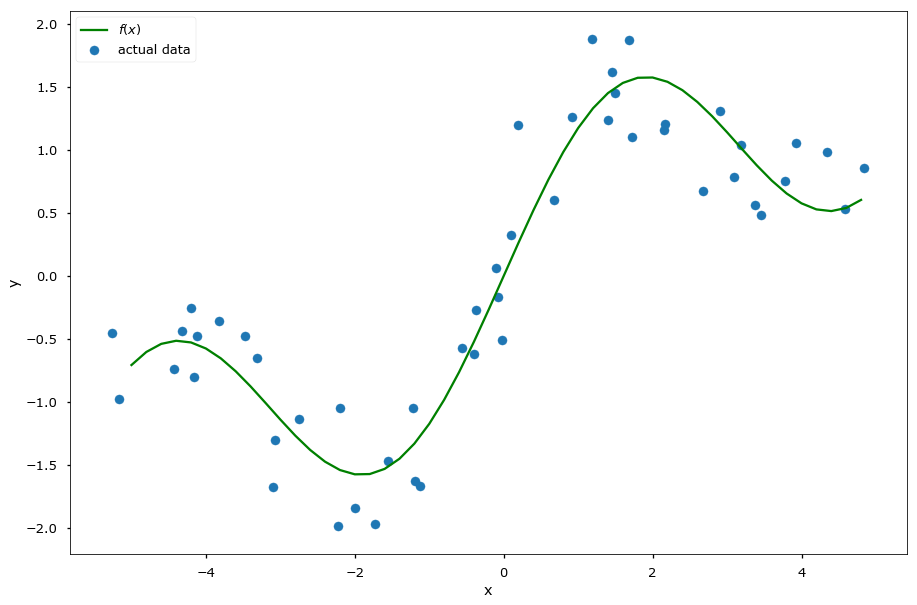

In [14]:
plt.plot(x_true, y_true, c='g', label='$f(x)$')
plt.scatter(x, y, label='actual data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)

In [15]:
def plot_linreg():
    lin_reg = LinearRegression()
    lin_reg.fit(x.reshape(-1,1), y)
    y_hat = lin_reg.predict(x_true.reshape(-1,1))
    
    plt.plot(x_true, y_true, c='g', label='$f(x)$')
    plt.scatter(x, y, label='actual data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_true, y_hat, c='r', label='linear regression')
    plt.legend(loc=2)

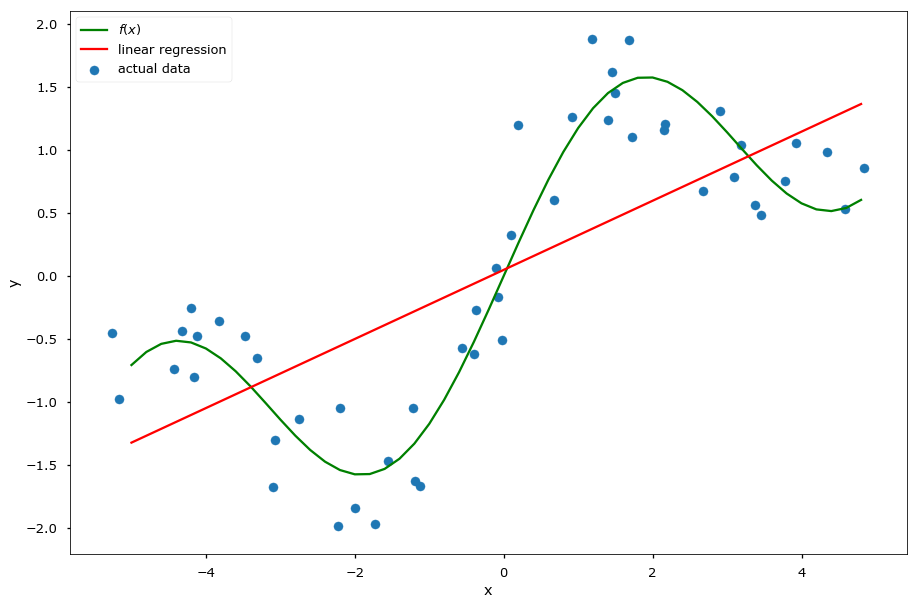

In [16]:
plot_linreg()

In [17]:
def plot_knn(k=1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x.reshape(-1,1), y)
    y_hat = knn.predict(x_true.reshape(-1,1))
    
    plt.plot(x_true, y_true, c='g', label='$f(x)$')
    plt.scatter(x, y, label='actual data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_true, y_hat, c='r', label='knn, $k=%d$' % k)
    plt.legend(loc=2)
    plt.show()
    
    return None

In [18]:
interact(plot_knn, k=IntSlider(min=1, max=10, value=1))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_knn(k=1)>

## Comments
* K nearest neighbours algorithm is abbreviated as K-NN.
* $k=1$: nearest neighbour algorithm




* *what is simpler - to train K-NN model or to apply it?*

## Dealing with similar rank
 

When several classes get the same rank, we can assign to class:

* with higher prior probability
* having closest representative
* having closest mean of representatives (among nearest neighbours)
* which is more compact, having nearest most distant representative 

## Parameters and modifications

* **Parameters:**

    * None

* **Hyperparameters**
    * the number of nearest neighbours $K$
    * distance metric $\rho(x,x')$


## Properties

* **Advantages:**

    * only similarity between objects is needed, not exact feature values.
        * so it may be applied to objects with arbitrary complex feature description   
    * simple to implement
    * interpretable (kind of.. case based reasoning)
    * does not need training
        * may be applied in online scenarios
        * cross-validation may be replaced with LOO.

* **Disadvantages:**
    * slow classification with complexity $O(NDK)$
    * accuracy deteriorates with the increase of feature space dimensionality (curse of dimentionality)

# Special properties

## Normalization of features

* Feature scaling affects predictions of K-NN?

## Normalization of features

* Feature scaling affects predictions of K-NN?
    * sure it does! Need to normalize
* Equal scaling - equal impact of features
* Non-equal scaling - non-equal impact of features
* Typical normalizations:
    * z-scoring (autoscaling): $$x_{j}'=\frac{x_{j}-\mu_{j}}{\sigma_{j}}$$ 
    * range scaling: $$x_{j}'=\frac{x_{j}-L_{j}}{U_{j}-L_{j}}$$

where $\mu_{j},\,\sigma_{j},\,L_{j},\,U_{j}$ are mean value, standard
deviation, minimum and maximum value of the $j$-th feature.

## The curse of dimensionality

* Phenomenon that occures in various fields and have varoius consequences (mainly negative)
* The curse of dimensionality: with growing $D$ data distribution becomes
sparse and insufficient.

## The curse of dimensionality
<center><img src='img/curse_2.png' width=1200></center>

* At what rate should training size grow with increase of $D$ to compensate curse of dimensionality?

## The curse of dimensionality

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">$D=2$<img src='https://jeremykun.files.wordpress.com/2016/01/2d-distances.png' width=400></th>
    <th class="tg-031e">$D=2 \dots 100$<img src='https://jeremykun.files.wordpress.com/2016/01/distances-animation.gif' width=400></th>
  </tr>
</table>

$$ \lim_{D \rightarrow \infty} \frac{\text{dist}_{max} - \text{dist}_{min}}{\text{dist}_{min}} = 0$$

## Curse of dimensionality

* Case of K-nearest neighbours:
    * assumption: objects are distributed uniformly in unit feature space
    * ball of radius $R$ has volume $V(R)=CR^{D}$, where $C=\frac{\pi^{D/2}}{\Gamma(D/2+1)}$.
    * ratio of volumes of unit cube and included ball:
$$
\frac{V(0.5)}{1}=\frac{0.5^{D}\pi^{D/2}}{(D/2)!}\stackrel{D\to\infty}{\longrightarrow}0
$$
    * most of volume concentrates on the corners of the cube
    * nearest neighbours stop being close by distance
* Good news: in real tasks the true dimensionality of the data is often less than $D$ and objects belong to the manifold with smaller dimensionality.

# Weighted account

## Equal voting

* Consider for object $x$: 
    * $x_{i_{1}}$most close neigbour, $x_{i_{2}}$ - second most close neighbour, etc.
    $$
    \rho(x,x_{i_{1}})\le\rho(x,x_{i_{2}})\le...\le\rho(x,x_{i_{N}})
    $$

* Classification:
$$\begin{align*}
g_{c}(x) & =\sum_{k=1}^{K}\mathbb{I}[y_{i_{k}}=c],\quad c=1,2,...C.\\
\widehat{y}(x) & =\arg\max_{c}g_{c}(x)
\end{align*}
$$

* Regression:
$$
\widehat{y}(x)=\frac{1}{K}\sum_{k=1}^{K}y_{i_{k}}
$$

## Weighted voting
* Weighted classification:
$$\begin{align*}
g_{c}(x) & =\sum_{k=1}^{K}w(k,\,\rho(x,x_{i_{k}}))\mathbb{I}[y_{i_{k}}=c],\quad c=1,2,...C.\\
\widehat{y}(x) & =\arg\max_{c}g_{c}(x)
\end{align*}
$$

* Weighted regression:
$$
\widehat{y}(x)=\frac{\sum_{k=1}^{K}w(k,\,\rho(x,x_{i_{k}}))y_{i_{k}}}{\sum_{k=1}^{K}w(k,\,\rho(x,x_{i_{k}}))}
$$

## Commonly chosen weights

Index dependent weights:
$$
w_{k}=\alpha^{k},\quad\alpha\in(0,1)
$$
$$
w_{k}=\frac{K+1-k}{K}
$$

Distance dependent weights:

$$
w_{k}=\begin{cases}
\frac{\rho(z_{K},x)-\rho(z_{k},x)}{\rho(z_{K},x)-\rho(z_{1},x)}, & \rho(z_{K},x)\ne\rho(z_{1},x)\\
1 & \rho(z_{K},x)=\rho(z_{1},x)
\end{cases}
$$
$$
w_{k}=\frac{1}{\rho(z_{k},x)}
$$

### Kernels

* $K(\rho, h)$ - some decreasing function
* $h \geq 0$ - parameter (window width)


* gaussian kernel $$K(\rho, h) \propto \exp(- \frac{\rho(x, x')^2}{2h^2})$$
* tophat kernel $$K(\rho, h) \propto 1\ if\ x < h$$
* epanechnikov kernel $$K(\rho, h) \propto 1 - \frac{\rho(x, x')^2}{h^2}$$
* exponential kernel $$K(\rho, h) \propto \exp(-\rho(x, x')/h)$$
* linear kernel $$K(\rho, h) \propto 1 - \rho(x, x')/h\ if\ d < h$$

## Kernels

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_0021.png' width=1200></center>

In [19]:

def plot_knn_class_kernel(k=1, h=0.5, prob=False, use_all=False):
    
    def gauss_kernel(d, h=h):
        return np.exp(-(d**2)/(2*h**2))
    
    plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    if use_all:
        knn = KNeighborsClassifier(n_neighbors=70, metric='minkowski', p=2, weights=gauss_kernel)
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2, weights=gauss_kernel)
    knn.fit(X_moons, y_moons)
    
    x_range = np.linspace(X_moons.min(), X_moons.max(), 500)
    # ОДЗ значений признаков

    xx1, xx2 = np.meshgrid(x_range, x_range)
    # всевозможные попарные значения признаков
    if prob:
        Y = knn.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])[:,1]
    else:
        Y = knn.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Y = Y.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Y, alpha=0.3)
    plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
    
    plt.show()

In [20]:
interact(plot_knn_class_kernel, k=IntSlider(min=1, max=10, value=1), 
               h=FloatSlider(min=0.05, max=5, value=1, step=0.05))

interactive(children=(IntSlider(value=1, description='k', max=10, min=1), FloatSlider(value=1.0, description='…

<function __main__.plot_knn_class_kernel(k=1, h=0.5, prob=False, use_all=False)>

# Summary

* Important hyperparameters of K-NN:
    * $K$: controls model complexity
    * $\rho(x,x')$

* Output depends on feature scaling.
    * scaling to equal / non-equal scatter possible.
* Prone to curse of dimensionality.
* Fast training but long prediction.
    * some efficiency improvements are possible though
* Weighted account for objects possible.

## FYI

* [About Curse of Dimentionality on cats and dogs](http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)
* [Search optimization benchmarks](http://jakevdp.github.io/blog/2013/04/29/benchmarking-nearest-neighbor-searches-in-python/)
* [Approximate nearest neighbours benchmarks](https://github.com/erikbern/ann-benchmarks)

## Use Case

* Despite being very primitive KNN demonstrated good performance in Facebook's Kaggle competiton
* Used to make features
* [Competiton page](https://www.kaggle.com/c/facebook-v-predicting-check-ins)